<a href="https://colab.research.google.com/github/Annieng184/Annieng184/blob/main/Covid_Case_Analysis_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Case Study**: Your are given the dataset on the number of **comfirmed**, **deaths**, and **recovery cases** from 2019 Novel Corona Virus. You are required to complete the following tasks 
![](https://www.aljazeera.com/mritems/Images/2020/3/4/b9d6e9c0f8774beda9ce21bb0eacbfe2_7.jpg)

In [ ]:
# Import Data and Libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

confirmed  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
#total deaths pandas
deaths_identifiers = deaths.columns[:4]
deaths_values = deaths.columns[4:]
clean_deaths = deaths.melt(id_vars = deaths_identifiers,
                           value_vars = deaths_values,
                           var_name = 'Date',
                           value_name = 'Deaths').drop(columns = ['Province/State','Lat','Long'])

clean_deaths['Date'] = pd.to_datetime(clean_deaths['Date'])
latest_deaths = clean_deaths[clean_deaths['Date'] == (clean_deaths['Date'].max())].groupby('Country/Region')['Deaths'].sum().reset_index()
latest_deaths

,Country/Region,Deaths
0,Afghanistan,7777
1,Albania,3582
2,Algeria,6878
3,Andorra,154
4,Angola,1917
...,...,...
194,West Bank and Gaza,5704
195,Winter Olympics 2022,0
196,Yemen,2155
197,Zambia,4016


In [ ]:
#total confirmed pandas
confirmed_identifiers = confirmed.columns[:4]
confirmed_values = confirmed.columns[4:]
clean_confirmed = confirmed.melt(id_vars = confirmed_identifiers,
                           value_vars = confirmed_values,
                           var_name = 'Date',
                           value_name = 'Confirmed').drop(columns = ['Province/State','Lat','Long'])
clean_confirmed['Date'] = pd.to_datetime(clean_confirmed['Date'])
latest_confirmed = clean_confirmed[clean_confirmed['Date'] == (clean_confirmed['Date'].max())].groupby('Country/Region')['Confirmed'].sum().reset_index()
latest_confirmed

,Country/Region,Confirmed
0,Afghanistan,193250
1,Albania,329352
2,Algeria,270304
3,Andorra,46027
4,Angola,102636
...,...,...
194,West Bank and Gaza,702332
195,Winter Olympics 2022,535
196,Yemen,11926
197,Zambia,332822


In [ ]:
#total recoveries pandas
recoveries_identifiers = recoveries.columns[:4]
recoveries_values = recoveries.columns[4:]
clean_recoveries = recoveries.melt(id_vars = recoveries_identifiers,
                           value_vars = recoveries_values,
                           var_name = 'Date',
                           value_name = 'Recoveries').drop(columns = ['Province/State','Lat','Long'])
clean_recoveries['Date'] = pd.to_datetime(clean_recoveries['Date']) #change to datetime
new_recoveries = clean_recoveries[clean_recoveries['Date'] <= '2021-08-04'] #date that stop recording recovery cases
latest_recoveries = new_recoveries[new_recoveries['Date'] == (new_recoveries['Date'].max())].groupby('Country/Region')['Recoveries'].sum().reset_index()
latest_recoveries

,Country/Region,Recoveries
0,Afghanistan,82586
1,Albania,130314
2,Algeria,118409
3,Andorra,14380
4,Angola,39582
...,...,...
194,West Bank and Gaza,312320
195,Winter Olympics 2022,0
196,Yemen,4251
197,Zambia,189658


In [ ]:
#Merge 3 tables into 1
deaths_confirmed = pd.merge(latest_deaths, latest_confirmed, on = ['Country/Region'], how='inner')
final_table = pd.merge(deaths_confirmed, latest_recoveries, on = ['Country/Region'], how='inner')
final_table


,Country/Region,Deaths,Confirmed,Recoveries
0,Afghanistan,7777,193250,82586
1,Albania,3582,329352,130314
2,Algeria,6878,270304,118409
3,Andorra,154,46027,14380
4,Angola,1917,102636,39582
...,...,...,...,...
194,West Bank and Gaza,5704,702332,312320
195,Winter Olympics 2022,0,535,0
196,Yemen,2155,11926,4251
197,Zambia,4016,332822,189658


In [ ]:
final_table.columns = ['Country', 'Deaths', 'Confirmed', 'Recoveries']
final_table.head(5)

,Country,Deaths,Confirmed,Recoveries
0,Afghanistan,7777,193250,82586
1,Albania,3582,329352,130314
2,Algeria,6878,270304,118409
3,Andorra,154,46027,14380
4,Angola,1917,102636,39582


*Data Dictionary*

Make sure you read this carefully. This will help you a lot.

| Variable | Definition |
|:--:|:--:|
| Province/State | Name of Province and State within the Country |
| Country/Region | Name of Country |
| Lat | Latitude of the Province |
| Long | Longitude of the Province |
| Day Columns | Report data in cummulative sum |

**1/ Write a function that reports the __latest__ situation of the Corona Virus in a __given country__.**

The function takes one argument as input - the country where the report is from, and prints out the following information:
- The country where the report is from
- Total confirmed cases
- Total death
- Total recovered

In [ ]:
# Your code here
# Feel free to add more code and text cells
def latest_situation(country):
  #Total deaths pandas
  deaths_identifiers = deaths.columns[:4]
  deaths_values = deaths.columns[4:]
  clean_deaths = deaths.melt(id_vars = deaths_identifiers,
                           value_vars = deaths_values,
                           var_name = 'Date',
                           value_name = 'Deaths').drop(columns = ['Province/State','Lat','Long'])
  clean_deaths['Date'] = pd.to_datetime(clean_deaths['Date'])
  latest_deaths = clean_deaths[clean_deaths['Date'] == (clean_deaths['Date'].max())].groupby('Country/Region')['Deaths'].sum().reset_index()
  #Total confirmed pandas
  confirmed_identifiers = confirmed.columns[:4]
  confirmed_values = confirmed.columns[4:]
  clean_confirmed = confirmed.melt(id_vars = confirmed_identifiers,
                           value_vars = confirmed_values,
                           var_name = 'Date',
                           value_name = 'Confirmed').drop(columns = ['Province/State','Lat','Long'])
  clean_confirmed['Date'] = pd.to_datetime(clean_confirmed['Date'])
  latest_confirmed = clean_confirmed[clean_confirmed['Date'] == (clean_confirmed['Date'].max())].groupby('Country/Region')['Confirmed'].sum().reset_index()
  #Total recoveries pandas
  recoveries_identifiers = recoveries.columns[:4]
  recoveries_values = recoveries.columns[4:]
  clean_recoveries = recoveries.melt(id_vars = recoveries_identifiers,
                           value_vars = recoveries_values,
                           var_name = 'Date',
                           value_name = 'Recoveries').drop(columns = ['Province/State','Lat','Long'])
  clean_recoveries['Date'] = pd.to_datetime(clean_recoveries['Date']) #change to datetime
  new_recoveries = clean_recoveries[clean_recoveries['Date'] <= '2021-08-04'] #date that stop recording recovery cases
  latest_recoveries = new_recoveries[new_recoveries['Date'] == (new_recoveries['Date'].max())].groupby('Country/Region')['Recoveries'].sum().reset_index()
  #Merge 3 tables into 1
  deaths_confirmed = pd.merge(latest_deaths, latest_confirmed, on = ['Country/Region'], how='inner')
  final_table = pd.merge(deaths_confirmed, latest_recoveries, on = ['Country/Region'], how='inner')
  #Rename column 'Country/Region' to shorter form 'Country'
  final_table.columns = ['Country', 'Deaths', 'Confirmed', 'Recoveries']

  for index, row in final_table.iterrows():
    return final_table[final_table['Country'] == country]

latest_situation('Vietnam')

,Country,Deaths,Confirmed,Recoveries
193,Vietnam,43117,11411679,54332


**2/ Visualize the situation until October 31st, 2020**. 

Determine the top 5 countries by the total number of confirmed cases **until October 31st, 2020**. 

From those 5 countries, plot the charts for each of them visualising the number of confirmed, death and recovered cases over time from the beginning **until October 31st, 2020**.  

*There should be three seperate plots for confirmed, death and recovered.*

In [ ]:
#Step 1: Find top 5 countries in Confirmed, Deaths, Recovered cases
#Step 2: Create a table with top 5 countries and date from 2020-01-22 to 2020-10-31

In [ ]:
#Define top5 countries with highest deaths
oct31_20_deaths = clean_deaths[clean_deaths['Date'] <= '2020-10-31']
oct31_20_deaths_top5 = oct31_20_deaths.groupby(['Country/Region', 'Date'])['Deaths'].sum()[oct31_20_deaths.groupby('Country/Region')['Deaths'].sum().sort_values(ascending = False).head(5).keys()].reset_index()
oct31_20_deaths_top5

,Country/Region,Date,Deaths
0,US,2020-01-22,0
1,US,2020-01-23,0
2,US,2020-01-24,0
3,US,2020-01-25,0
4,US,2020-01-26,0
...,...,...,...
1415,India,2020-10-27,120010
1416,India,2020-10-28,120527
1417,India,2020-10-29,121090
1418,India,2020-10-30,121641


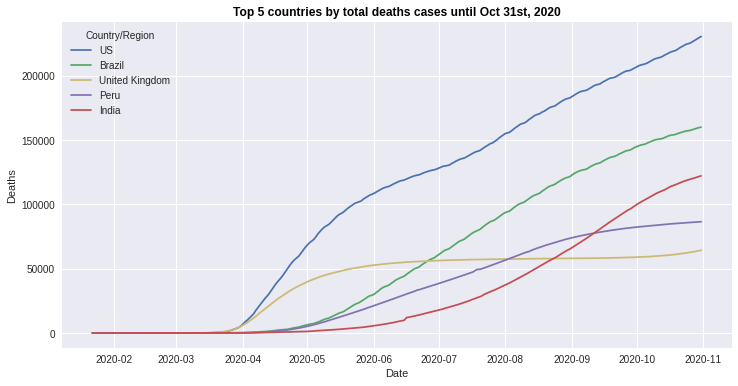

In [ ]:
# Line plot top 5 countries with most deaths cases 
palette ={"US": "C0", "Brazil": "C1", "India": "C2", 'Peru': 'C3', 'United Kingdom': 'C4', 'Russia': 'C5', 'Spain': 'C6', 'Mexico': 'C9'}

plt.figure(figsize = (12,6))
sns.lineplot(data = oct31_20_deaths_top5,
             x = 'Date', 
             y = 'Deaths',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total deaths cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()

In [ ]:
#Define top5 countries with highest confirmed case
oct31_20_confirmed = clean_confirmed[clean_confirmed['Date'] <= '2020-10-31']
oct31_20_confirmed_top5 = oct31_20_confirmed.groupby(['Country/Region', 'Date'])['Confirmed'].sum()[oct31_20_confirmed.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending = False).head(5).keys()].reset_index()
oct31_20_confirmed_top5


,Country/Region,Date,Confirmed
0,US,2020-01-22,1
1,US,2020-01-23,1
2,US,2020-01-24,2
3,US,2020-01-25,2
4,US,2020-01-26,5
...,...,...,...
1415,Spain,2020-10-27,1116738
1416,Spain,2020-10-28,1136503
1417,Spain,2020-10-29,1160083
1418,Spain,2020-10-30,1185678


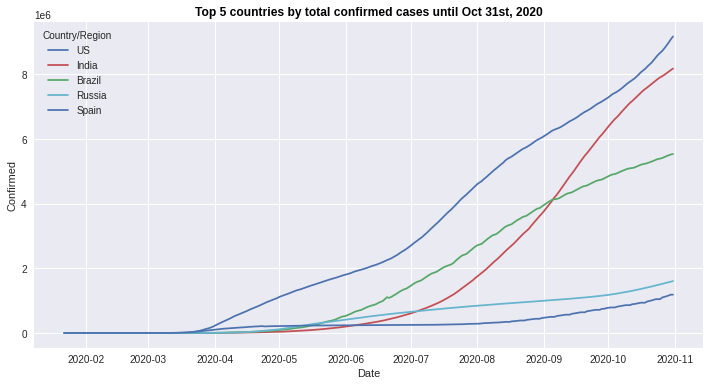

In [ ]:
# Line plot top 5 countries with most confirmed cases 
palette ={"US": "C0", "Brazil": "C1", "India": "C2", 'Peru': 'C3', 'United Kingdom': 'C4', 'Russia': 'C5', 'Spain': 'C6', 'Mexico': 'C9'}

plt.figure(figsize = (12,6))
sns.lineplot(data = oct31_20_confirmed_top5,
             x = 'Date', 
             y = 'Confirmed',
             hue = 'Country/Region', palette = palette)

plt.title('Top 5 countries by total confirmed cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()

In [ ]:
clean_recoveries

,Country/Region,Date,Recoveries
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
257305,West Bank and Gaza,2022-08-31,0
257306,Winter Olympics 2022,2022-08-31,0
257307,Yemen,2022-08-31,0
257308,Zambia,2022-08-31,0


In [ ]:
#Define top5 countries with highest recovery case
oct31_20_recoveries = clean_recoveries[clean_recoveries['Date'] <= '2020-10-31']
oct31_20_recoveries_top5 = oct31_20_recoveries.groupby(['Country/Region', 'Date'])['Recoveries'].sum()[oct31_20_recoveries.groupby('Country/Region')['Recoveries'].sum().sort_values(ascending = False).head(5).keys()].reset_index()
oct31_20_recoveries_top5

,Country/Region,Date,Recoveries
0,India,2020-01-22,0
1,India,2020-01-23,0
2,India,2020-01-24,0
3,India,2020-01-25,0
4,India,2020-01-26,0
...,...,...,...
1415,Mexico,2020-10-27,763105
1416,Mexico,2020-10-28,765128
1417,Mexico,2020-10-29,770007
1418,Mexico,2020-10-30,774567


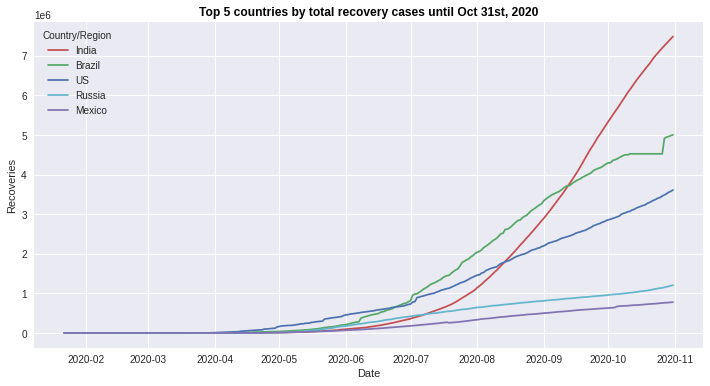

In [ ]:
# Line plot top 5 countries with most recovery cases 
palette ={"US": "C0", "Brazil": "C1", "India": "C2", 'Peru': 'C3', 'United Kingdom': 'C4', 'Russia': 'C5', 'Spain': 'C6', 'Mexico': 'C9'}

plt.figure(figsize = (12,6))
sns.lineplot(data = oct31_20_recoveries_top5,
             x = 'Date', 
             y = 'Recoveries',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total recovery cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()

In [ ]:
oct31_20_confirmed_top5

,Country/Region,Date,Confirmed
0,US,2020-01-22,1
1,US,2020-01-23,1
2,US,2020-01-24,2
3,US,2020-01-25,2
4,US,2020-01-26,5
...,...,...,...
1415,Spain,2020-10-27,1116738
1416,Spain,2020-10-28,1136503
1417,Spain,2020-10-29,1160083
1418,Spain,2020-10-30,1185678


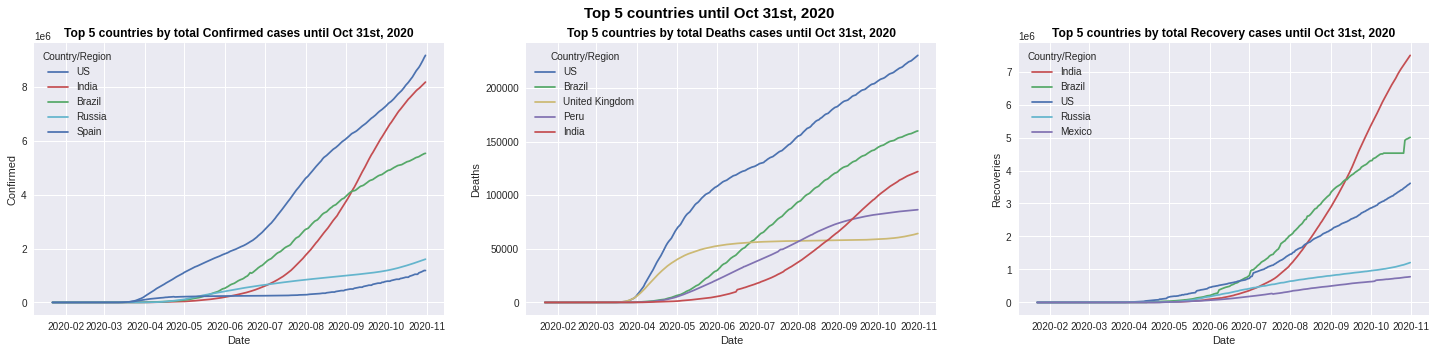

In [ ]:
#Combine 3 tables into 1 frame
palette ={"US": "C0", "Brazil": "C1", "India": "C2", 'Peru': 'C3', 'United Kingdom': 'C4', 'Russia': 'C5', 'Spain': 'C6', 'Mexico': 'C9'}

plt.figure(figsize = (25,5))
plt.suptitle('Top 5 countries until Oct 31st, 2020', size = 15, color = 'black', fontweight = 'bold')

plt.subplot(131)
sns.lineplot(data = oct31_20_confirmed_top5,
             x = 'Date', 
             y = 'Confirmed',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total Confirmed cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')


plt.subplot(132)
sns.lineplot(data = oct31_20_deaths_top5,
             x = 'Date', 
             y = 'Deaths',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total Deaths cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')



plt.subplot(133)
sns.lineplot(data = oct31_20_recoveries_top5,
             x = 'Date', 
             y = 'Recoveries',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total Recovery cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()

**3/ Until October 31st, 2020, among the top 5 countries identified, which country/countries should we pay special attention to? Support your arguments with further analysis and visualization.**

*Let's take a look again at the covid situation among top5 countries in Deaths, Confirmed and Recoveries cases, we can see that US in blue increased significantly since April, 2020 and rose to the top with the most cases. With the stressful situation during covid period, US is always at the top in the number of confirmed cases and the number of deaths and far ahead of the rest of the top 5.*

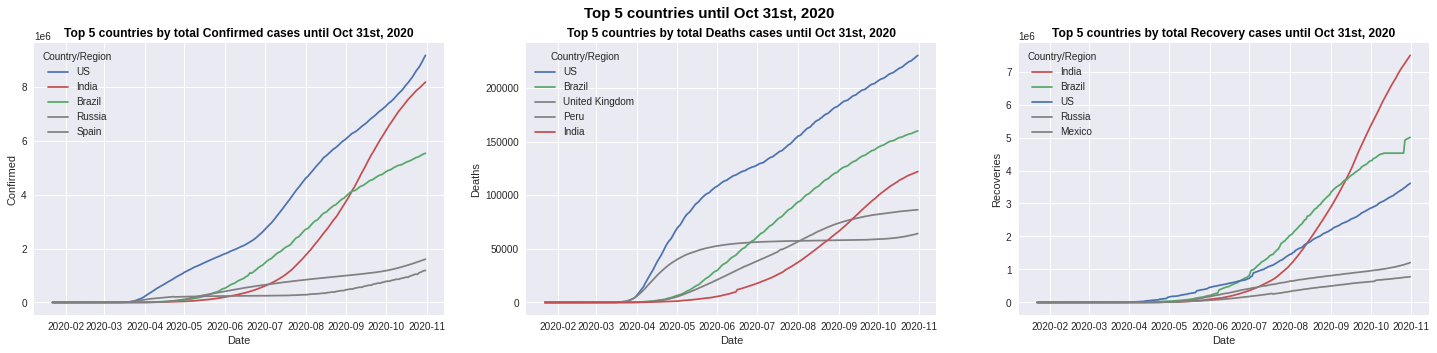

In [ ]:
palette ={'US': "C0", "Brazil": "C1", "India": "C2", 'Peru': 'grey', 'United Kingdom': 'grey', 'Russia': 'grey', 'Spain': 'grey', 'Mexico': 'grey'}

plt.figure(figsize = (25,5))
plt.suptitle('Top 5 countries until Oct 31st, 2020', size = 15, color = 'black', fontweight = 'bold')

plt.subplot(131)
sns.lineplot(data = oct31_20_confirmed_top5,
             x = 'Date', 
             y = 'Confirmed',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total Confirmed cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')


plt.subplot(132)
sns.lineplot(data = oct31_20_deaths_top5,
             x = 'Date', 
             y = 'Deaths',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total Deaths cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')



plt.subplot(133)
sns.lineplot(data = oct31_20_recoveries_top5,
             x = 'Date', 
             y = 'Recoveries',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total Recovery cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()

In [ ]:
#Merge 3 tables into 1 (only US) and find the proportion of deaths/confirmed
us_deaths = oct31_20_deaths_top5[oct31_20_deaths_top5['Country/Region'] == 'US']
us_confirmed = oct31_20_confirmed_top5[oct31_20_confirmed_top5['Country/Region'] == 'US']
us_recoveries = oct31_20_recoveries_top5[oct31_20_recoveries_top5['Country/Region'] == 'US']
us_deaths_confirmed = pd.merge(us_deaths, us_confirmed, on = ('Date', 'Country/Region'), how = 'inner')
us_total = pd.merge(us_recoveries, us_deaths_confirmed, on = ('Date', 'Country/Region'), how = 'inner')
us_total['Deaths/Confirmed'] = (us_total['Deaths'] / us_total['Confirmed']) * 100
us_total

,Country/Region,Date,Recoveries,Deaths,Confirmed,Deaths/Confirmed
0,US,2020-01-22,0,0,1,0.000000
1,US,2020-01-23,0,0,1,0.000000
2,US,2020-01-24,0,0,2,0.000000
3,US,2020-01-25,0,0,2,0.000000
4,US,2020-01-26,0,0,5,0.000000
...,...,...,...,...,...,...
279,US,2020-10-27,3487666,226439,8808814,2.570596
280,US,2020-10-28,3518140,227480,8897195,2.556761
281,US,2020-10-29,3554336,228478,8989908,2.541494
282,US,2020-10-30,3578452,229550,9090414,2.525188


*Deaths cases accounts for a small percentage compared to Confirmed cases around 3% - 6%*

In [ ]:
us_total[(us_total['Date'] > '2020-06-01') & (us_total['Date'] <'2020-08-31')] 

,Country/Region,Date,Recoveries,Deaths,Confirmed,Deaths/Confirmed
132,US,2020-06-02,463868,109582,1828871,5.991784
133,US,2020-06-03,479258,110582,1847956,5.984017
134,US,2020-06-04,485002,111580,1875763,5.948513
135,US,2020-06-05,491706,112450,1902100,5.911887
136,US,2020-06-06,500849,113088,1922256,5.883087
...,...,...,...,...,...,...
217,US,2020-08-26,2084465,178840,5840274,3.062185
218,US,2020-08-27,2101326,179949,5890710,3.054793
219,US,2020-08-28,2118367,180874,5937026,3.046542
220,US,2020-08-29,2140614,181835,5980078,3.040679


*However, things started to change in June 2020 when Brazil overtook the US in the number of recovered cases and became top 1. Followed by India surpassed US in August. This is odd while US was still in top 1 in confirmed cases. Even though US with highest number of deaths cases but was only a small proportion compared confirmed case (table above, max was 6%). There must be wrong with recoveries case updates in this period (June-August/2020). US should have been the countries with highest recoveries case in given period.*

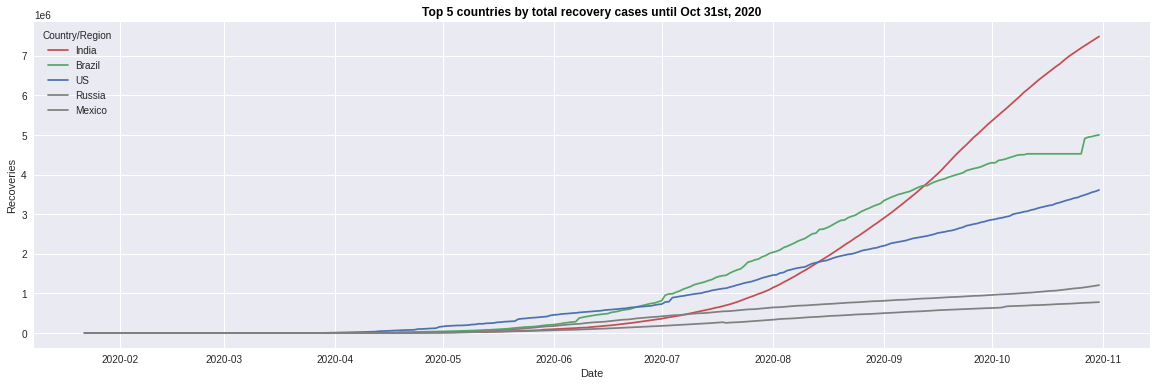

In [ ]:
palette ={'US': "C0", "Brazil": "C1", "India": "C2", 'Peru': 'grey', 'United Kingdom': 'grey', 'Russia': 'grey', 'Spain': 'grey', 'Mexico': 'grey'}

plt.figure(figsize = (20,6))
sns.lineplot(data = oct31_20_recoveries_top5,
             x = 'Date', 
             y = 'Recoveries',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total recovery cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()

In [ ]:
#Combine 3 tables into 1 to check US case clearly
total_table = pd.concat([oct31_20_deaths_top5, oct31_20_confirmed_top5, oct31_20_recoveries_top5], axis = 0)
new_table = total_table.melt(id_vars = ['Country/Region', 'Date'], 
                           value_vars = ['Deaths', 'Confirmed', 'Recoveries'],
                           var_name = 'Situation', 
                           value_name = 'Report')

new_table_us = new_table[new_table['Country/Region'] == 'US']
new_table_us

,Country/Region,Date,Situation,Report
0,US,2020-01-22,Deaths,0.0
1,US,2020-01-23,Deaths,0.0
2,US,2020-01-24,Deaths,0.0
3,US,2020-01-25,Deaths,0.0
4,US,2020-01-26,Deaths,0.0
...,...,...,...,...
12207,US,2020-10-27,Recoveries,3487666.0
12208,US,2020-10-28,Recoveries,3518140.0
12209,US,2020-10-29,Recoveries,3554336.0
12210,US,2020-10-30,Recoveries,3578452.0


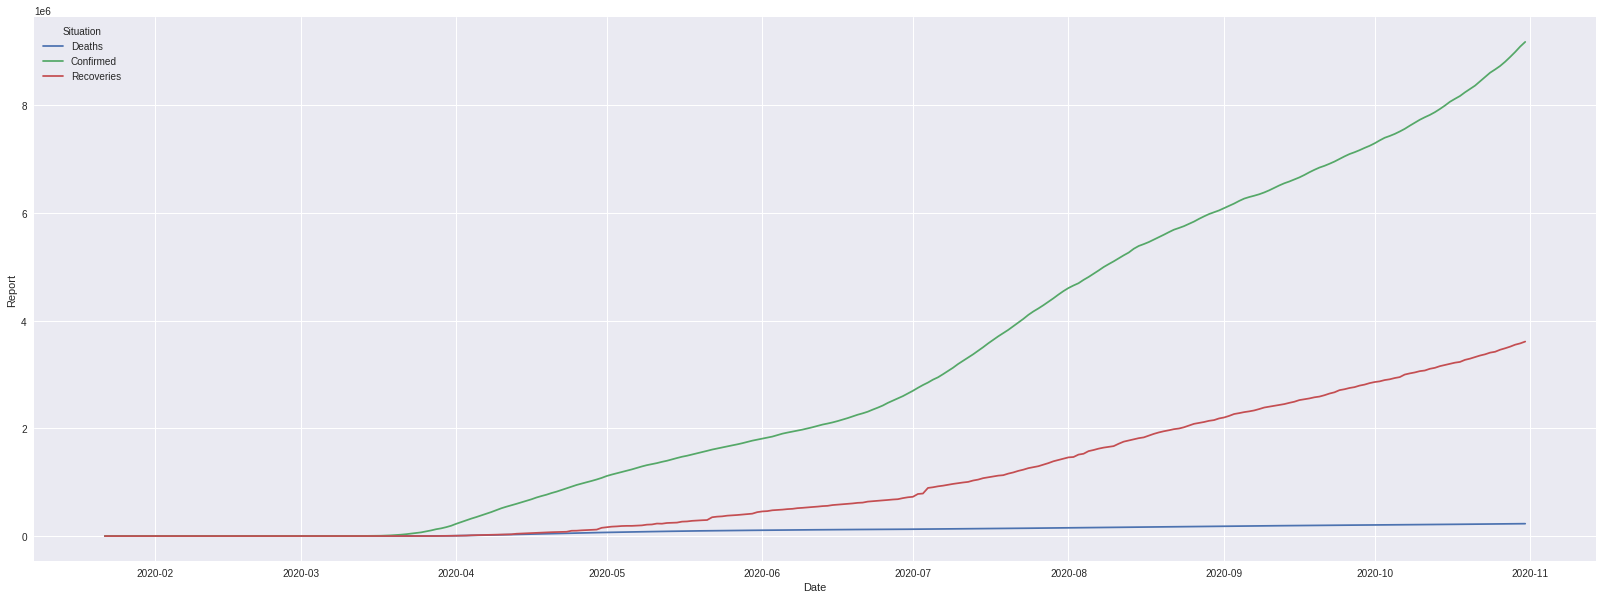

In [ ]:
#Plot 3 situations of US in 1 chart
plt.figure(figsize = (28,10))
sns.lineplot(data = new_table_us,
             x = 'Date', 
             y = 'Report',
             hue = 'Situation')
plt.ylim = (0, 8000000)
plt.show()